In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [98]:
df = pd.read_excel('report.xlsb', engine='pyxlsb', sheet_name= 'Pedidos Bees')


In [85]:
#função para verificar valores nulos
df.isnull().sum()

CONCAT                            0
Coluna1                           0
PEDIDOS BEES                      0
PEDIDO FAS                       16
ID CLIENTE FAS                    0
DATA                              0
HORA                              0
STATUS                            0
Numero Nota fiscal               85
VALOR TOTAL                       0
Forma de pagamento                0
Quantidade de itens do pedido     0
MÊS                               0
dtype: int64

In [86]:
#função para trocar os valores nulos por zero
df = df.fillna(0)

In [87]:
# função para verificar se os valores nulos foram tratados
df.isnull().sum()

CONCAT                           0
Coluna1                          0
PEDIDOS BEES                     0
PEDIDO FAS                       0
ID CLIENTE FAS                   0
DATA                             0
HORA                             0
STATUS                           0
Numero Nota fiscal               0
VALOR TOTAL                      0
Forma de pagamento               0
Quantidade de itens do pedido    0
MÊS                              0
dtype: int64

In [89]:
print(df.dtypes)

CONCAT                           float64
Coluna1                            int64
PEDIDOS BEES                       int64
PEDIDO FAS                       float64
ID CLIENTE FAS                     int64
DATA                               int64
HORA                             float64
STATUS                            object
Numero Nota fiscal               float64
VALOR TOTAL                      float64
Forma de pagamento                object
Quantidade de itens do pedido      int64
MÊS                                int64
dtype: object


In [96]:
df['DATA'].astype('object')

0      44970
1      44970
2      44970
3      44970
4      44964
       ...  
660    44840
661    44841
662    44841
663    44841
664    44841
Name: DATA, Length: 665, dtype: object

In [99]:
df.head()

,CONCAT,Coluna1,PEDIDOS BEES,PEDIDO FAS,ID CLIENTE FAS,DATA,data2,HORA,STATUS,Numero Nota fiscal,VALOR TOTAL,Forma de pagamento,Quantidade de itens do pedido,MÊS
0,9.089100e+15,57039,9089100317,NaN,890050267014820,44970,NaN,0.633264,Registrado,NaN,1053.31,Boleto,348,2
1,9.089103e+15,57039,9089103140,NaN,890050096011373,44970,NaN,0.637975,Registrado,NaN,975.97,Boleto,258,2
2,9.089105e+15,57010,9089105115,NaN,890000010068795,44970,NaN,0.641250,Registrado,NaN,440.23,Boleto,108,2
3,9.089119e+15,57010,9089119488,NaN,45544574000169,44970,NaN,0.663634,Registrado,NaN,100.37,Boleto,22,2
4,9.088399e+15,57039,9088398693,1049181.0,890050267013379,44964,44964.0,0.791076,Em transito,NaN,1562.76,Boleto,435,2


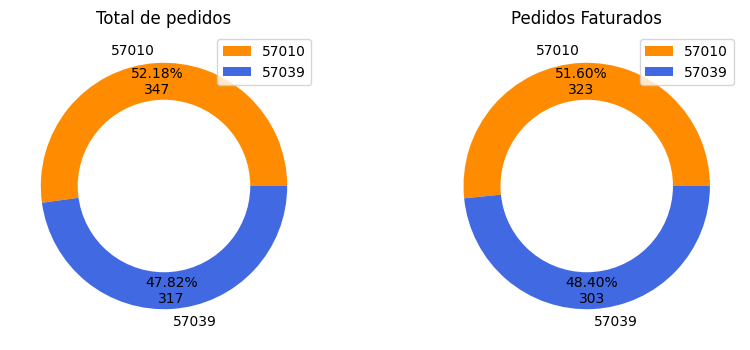

In [70]:
figura= plt.figure(figsize=(10,4))
figura.add_subplot(121)
#adicionando o que sera representado no grafico
nome_cdvs=[57010,57039]
#adicionando valores
#criando funcao para colocar os valores no grafico
contagem_cdvs = df['Coluna1'].value_counts(ascending=False)

#funcão para criar a auto porcentagem com % e numero em baixo.
def func(pct, allvalues): 
    absolute = int(pct / 100.*np.sum(allvalues)) 
    return "{:.2f}%\n{:d}".format(pct, absolute)
#adicionando cores
cores = ['#FF8C00','#4169E1']
#distanciamento das partes
explosion = (0.0,0.0)
#criando grafico de pizza
plt.pie(contagem_cdvs,autopct= lambda pct: func(pct,contagem_cdvs), colors=cores,labels=nome_cdvs,pctdistance=0.85,explode=explosion,startangle= 0)
#desenhando o circulo
circulo_centro = plt.Circle((0,0),0.70, fc='white')
fig = plt.gcf()
#adiionando o circulo ao grafico de pizza
fig.gca().add_artist(circulo_centro)
#adicionando titulo ao grafico
plt.title('Total de pedidos')
plt.legend()

figura.add_subplot(122) #criação do segundo grafico
#filtrar linhas do dataframe(excel)
somente_pedidos_concluidos = df['STATUS'] != 'Cancelado'
filtro_concluido = df[somente_pedidos_concluidos]
#adicionando o que sera representado no grafico
nome_cdvs=[57010,57039]
#criando funcao para colocar os valores no grafico
contagem_cdvs = filtro_concluido['Coluna1'].value_counts(ascending=False)
#funcão para criar a auto porcentagem com % e numero em baixo.
def fun(pct, allvalues):
    absolute = int(pct/100.*np.sum(allvalues))
    return "{:.2f}%\n{:d}".format(pct,absolute)
#adicionando cores
cores = ['#FF8C00','#4169E1']
#distanciamento das partes
explosion = (0.0,0.0)
#criando grafico de pizza
plt.pie(contagem_cdvs, autopct = lambda pct: func(pct,contagem_cdvs), colors = cores,labels = nome_cdvs, pctdistance=0.85, explode = explosion,startangle= 0)
#desenhando o circulo
circulo_centro = plt.Circle((0,0),0.70, fc='white')
fig = plt.gcf()
#adiionando o circulo ao grafico de pizza
fig.gca().add_artist(circulo_centro)
#adicionando titulo ao grafico
plt.title('Pedidos Faturados')
plt.legend()
#mostrar na tela
plt.show(figura)


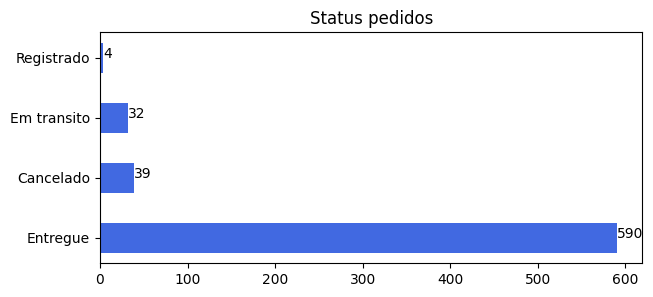

In [71]:
#criando o espaço onde ficara o grafico e configurando o tamanho
fig = plt.figure(figsize=(7,3))
figura.add_subplot()

#fazendo a agrupagem e a contagem dos status dos pedidos
contagem_status = df['STATUS'].value_counts(ascending=False)
#nome dos status para o eixo vertical
nomes_status = ('Entregue','Cancelado','Em transito','Registrado')
plt.barh(nomes_status, contagem_status, color="#4169E1",height = 0.5, align='center')
for index, value in enumerate(contagem_status):
    plt.text(value, index,
             str(value))
plt.title('Status pedidos')
plt.show()

In [90]:
df['DATA'] = pd.to_datetime(df['DATA'])

#deixando as datas em ordem decrescente
intervalo_datas = df.sort_values(by=['DATA'],ascending=True)

#fazendo a contagem das datas

print(df.dtypes)

CONCAT                                  float64
Coluna1                                   int64
PEDIDOS BEES                              int64
PEDIDO FAS                              float64
ID CLIENTE FAS                            int64
DATA                             datetime64[ns]
HORA                                    float64
STATUS                                   object
Numero Nota fiscal                      float64
VALOR TOTAL                             float64
Forma de pagamento                       object
Quantidade de itens do pedido             int64
MÊS                                       int64
dtype: object


In [91]:
df.head()

,CONCAT,Coluna1,PEDIDOS BEES,PEDIDO FAS,ID CLIENTE FAS,DATA,HORA,STATUS,Numero Nota fiscal,VALOR TOTAL,Forma de pagamento,Quantidade de itens do pedido,MÊS
0,9.089100e+15,57039,9089100317,0.0,890050267014820,1970-01-01 00:00:00.000044970,0.633264,Registrado,0.0,1053.31,Boleto,348,2
1,9.089103e+15,57039,9089103140,0.0,890050096011373,1970-01-01 00:00:00.000044970,0.637975,Registrado,0.0,975.97,Boleto,258,2
2,9.089105e+15,57010,9089105115,0.0,890000010068795,1970-01-01 00:00:00.000044970,0.641250,Registrado,0.0,440.23,Boleto,108,2
3,9.089119e+15,57010,9089119488,0.0,45544574000169,1970-01-01 00:00:00.000044970,0.663634,Registrado,0.0,100.37,Boleto,22,2
4,9.088399e+15,57039,9088398693,1049181.0,890050267013379,1970-01-01 00:00:00.000044964,0.791076,Em transito,0.0,1562.76,Boleto,435,2
